# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.7.4
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.5
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.65.4
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.5
ipython                      8.26.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
keras                        3.4.1
kiwisolver                   1.4.5
li


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\matth\AppData\Local\Temp\ipykernel_17232\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): #looping through each folder in data directory
    for image in os.listdir(os.path.join(data_dir, image_class)): #looping through every image, joining the paths (data and happy, data and sad)
        image_path = os.path.join(data_dir, image_class, image) #grabbing each img explicitly
        try: #bunch of checks
            img = cv2.imread(image_path) #opening img using cv, stores it as numpy array
            # img.shape can show how many pixels wide and long it is, and how many channels (coloured)
            #can render them using matplotlib stuff
            tip = imghdr.what(image_path) #gets the extension
            if tip not in image_exts: #if not a valid extension, removes the img
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
#as imghdr is deprectaed, could just grab the img file type another way and rewrite this, pretty easy

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data') #builds image dataset (no need to build labels or classes, does preprocessing (resizing) # a generator, batchset of 32

Found 305 files belonging to 2 classes.


In [12]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
tf.keras.utils.image_dataset_from_directory?? #this also takes care of the labels

SyntaxError: invalid syntax (1220758637.py, line 1)

In [15]:
data_iterator = data.as_numpy_iterator()  #numpy iterator, can get consecutive batches doing .next, allows us to use the generator

In [16]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001B7C7DDC890>)

In [17]:
batch = data_iterator.next() #2 parts, the images (loaded into mem as numpy arrs, and then the labels (happy or sad) 1=sad, 0=happy

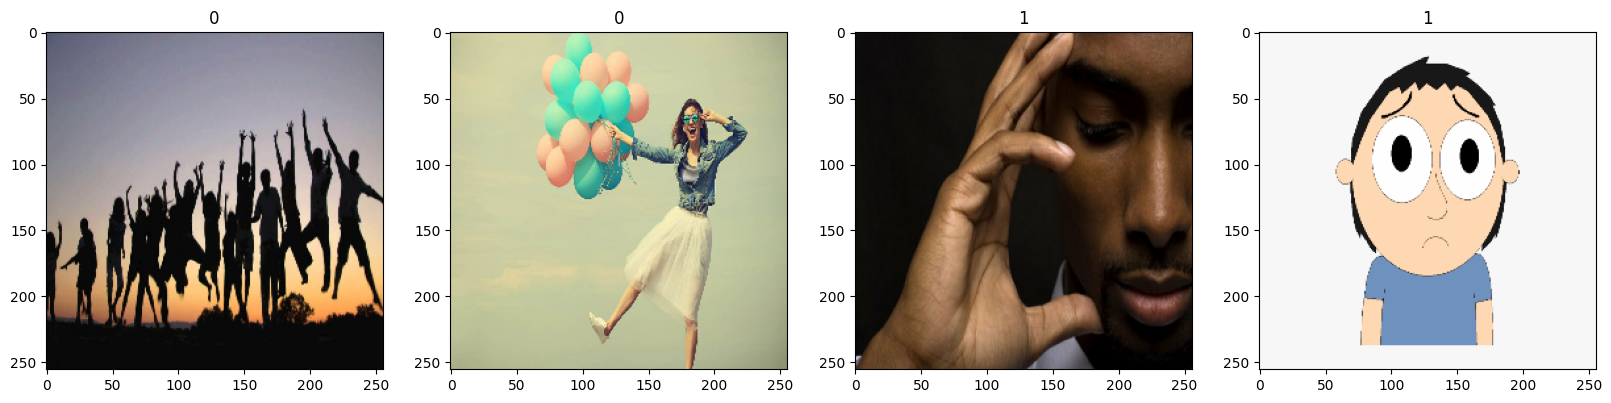

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #plotting imgs, since the generator does preprocessing, all we need to do is plot them
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int)) #imshow used to display data as an img
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [19]:
batch[1] #images = batch[0], batch[1] is labels

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [20]:
batch[0].shape #tensorflow is rgb (0 to 255) #so this is saying batch has 32 images of size 256x256, using 3 colour channels (RGB)

(32, 256, 256, 3)

In [21]:
data = data.map(lambda x,y: (x/255, y)) #y is target, x is images(indep), so we use .map to execute the lambda func (that only affects x) for each item in the iterable data
#we preprocess by scaling img vales to btwn 0 and 1 (normalizing) instead of 0 and 255 (for images), and then split data into training, testing, and validation partitions.
#colour values range from 0 to 255, so when batched, this is the range of the img vals
#want to normalize these values to 0 and 1 in the data pipeline, ideally we want values as small as possible (hence /255 to normalize)

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.9529412 , 1.        , 0.99215686],
          [0.9525046 , 0.9995634 , 0.99172026],
          [0.94756436, 0.9946232 , 0.98678005],
          ...,
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ]],
 
         [[0.9529412 , 1.        , 0.99215686],
          [0.9522548 , 0.9993136 , 0.99147046],
          [0.9457366 , 0.9927954 , 0.9849523 ],
          ...,
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ]],
 
         [[0.9540253 , 0.9988323 , 0.9921151 ],
          [0.9521934 , 0.99700034, 0.99028313],
          [0.9454963 , 0.99030334, 0.9835861 ],
          ...,
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ],
          [0.99215686, 0.99215686, 1.        ]],
 
         ...,
 
         [[0.4936476 , 0.43482408, 0.3210986 ],
          [0.76027

# 5. Split Data

In [23]:
len(data) #=10 because 305 images, split into batches of 32, hence 10 batches, the 10th one being half full

10

In [24]:
train_size = int(len(data)*.7) #splitting into training and testing, training is 70% of data
val_size = int(len(data)*.2) #20% for validation, used to finetune how we build this model
test_size = int(len(data)*.1) #10% for test, model will not have seen until very end( to test)

In [25]:
train_size

7

In [26]:
test_size

1

In [28]:
train = data.take(train_size) #take is how much data we are going to take in that partition, so we are taking train_size batches of data for train partition
val = data.skip(train_size).take(val_size) #skip the batches that were in train, and then take the next batches into val
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential #sequential is good for 1 data in and 1 data out, quick and easy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #these are all layers
#conv2d = convolutional neural network, spatial convolution = used for processing and analyzing imgs /spatial data
#maxpooling2d layer = condensing layer, goes thru images and denses them down (returns max val in a region)
#flatten reduces channels, reshapes into a 1d arr
#dropout = regularization
#watch a deep learning tutorial, and a cnn tutorial for image processing in deep learning
#NEURAL NETWORK TUTORIAL

In [31]:
model = Sequential() #this is the model, can then add layers

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #adding conv and max pooling layer #first layer always has input

#conv layer has 16 filters, 3x3 pixels in size, stride of 1 (moving 1 pixel at a time
#scans over image and tries to condense or extract relevant info inside of the image to make an output
#activation is relu, taking output out of conv layer, relu means any output below 0 turns to 0, anything else stays the same (can google relu activation and see graph)
#activation is reshaping the output, sigmoid squishes output to be between 0 and 1, while relu is from 0 to inf
#input shape is the shape the layer should expect (in this case its the shape of the images, with 3 colour channels
model.add(MaxPooling2D()) #taking max val after relu activation and returning that value (not just returning 1 number, it goes through a 2x2 region, so reducing img data (condensing)

model.add(Conv2D(32, (3,3), 1, activation='relu')) #doing it again
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu')) #doing it again
model.add(MaxPooling2D())

model.add(Flatten()) #flattening data down (we dont want channel value) # of filters form channel val, which we dont want in dense layers since we want a single val, converting all to 1d array

model.add(Dense(256, activation='relu')) #dense layers are fully connected layers, 256 neurons (256 output vals)
model.add(Dense(1, activation='sigmoid')) #getting a single output, 0 or 1 because sigmoid activation ( 0 and 1 map to happy and sad

C:\Users\matth\ImageClassification\imgcl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#compile model, 'adam' optimizer
#tf.optimizers. a ton of optimizers
#metrics accuracy tells us how well our model is doing (how accurate)

In [34]:
model.summary() #254/2, maxpooling is 2x2 #30x30x16 = 14400 (flattening to 1d arr)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #callback to save model at a checkpoint or do specific logging

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) #fit is training component, predict is for use.
#data, epochs = how long to train for, 1 epoch=1run, validation_data= for validating model, see how good its running, callbacks = want to log out to tensorboard

#note: Overfitting a model is when you use a dataset too large, and it basically just memorizes instead of train, so it will perform bad on unseen exs

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.9893 - loss: 0.0368 - val_accuracy: 0.9844 - val_loss: 0.0195
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.9893 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.9947 - loss: 0.0059 - val_accuracy: 0.9844 - val_loss: 0.0243
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 8.0640e-04
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.9893 - loss: 0.0144 - val_accuracy: 1.0000 - val_l

# 8. Plot Performance

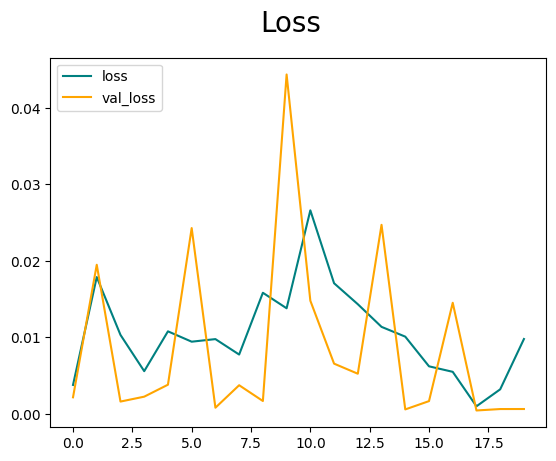

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#if loss decreasing and val_loss increasing, indictation of overfitting - change data / apply regularization
#if no decrease in loss, means it not learning

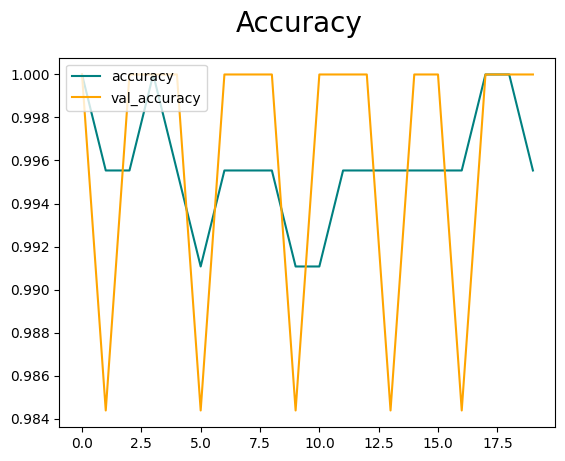

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate (performance on testing data)

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): #in this case theres only 1 batch, but there could be more
    X, y = batch #unpacking (x=images, y= true value (0 or 1)
    yhat = model.predict(X) #passing data into model and making predictions (returns val btwn 0 and 1 (sigmoid activation)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat) #updating all metrics so we can see how it performs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [44]:
print(pre.result(), re.result(), acc.result()) #higher value = better (between 0 and 1)

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [45]:
import cv2

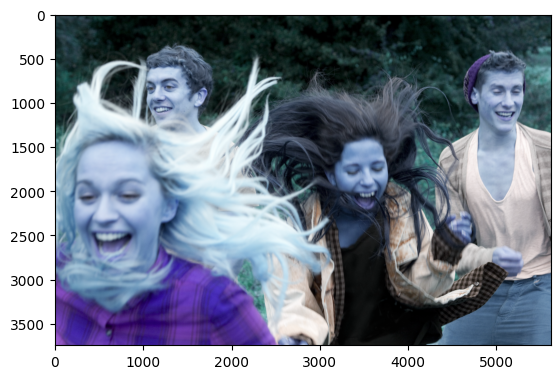

In [46]:
img = cv2.imread('154006829.jpg') #reading in an image that model has never seen before
plt.imshow(img)
plt.show()

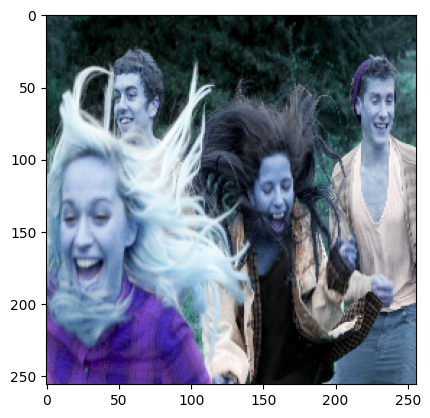

In [47]:
resize = tf.image.resize(img, (256,256)) #resizing image for proper use in model (since all imgs need to be same size
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #np.expand_dims expands the dimensions of the object, since our model is expecting a batch and not a single img, 
#we have to expand dimensions (put it in a list essentially
#dividing by 255 to scale/normalize it

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [49]:
yhat #above 0.5=1 below =0 (since only 2 vals)

array([[0.01081842]], dtype=float32)

In [51]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('models','imageclassifier.h5')) #saving the model as a file to be loaded in after

In [55]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [56]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[0.01081842]], dtype=float32)